In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
def model(x_obs, param):
    y_model = param[0]*x_obs + param[1]
    return y_model

In [3]:
def loglikelihood(x_obs, y_obs, param):
    y_model = model(x_obs, param)
    p = y_model * np.exp(-(y_model/y_obs)) # gamma con k=2 https://en.wikipedia.org/wiki/Gamma_distribution
    p = np.log(p)
    return np.sum(p)

In [25]:
def logprior(param):
    if np.abs(param[0] < 1E-2) and param[1] < 20 and param[1]>0:
        p = 0.0
    else:
        p = -np.inf
    return p

In [26]:
def metropolis(x_obs, y_obs, N = 50000):
    l_param = [np.array([1/8000.0, 10.0])]
    sigma_param = np.array([1E-4, 0.5])
    n_param = len(sigma_param)
    for i in range(1,N):
        propuesta  = l_param[i-1] + np.random.normal(size=n_param)*sigma_param
        #print(propuesta)
        logposterior_viejo = loglikelihood(x_obs, y_obs, l_param[i-1]) + logprior(l_param[i-1])
        logposterior_nuevo = loglikelihood(x_obs, y_obs, propuesta) + logprior(propuesta)

        r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
        alpha = np.random.random()
        if(alpha<r):
            l_param.append(propuesta)
        else:
            l_param.append(l_param[i-1])

    l_param = np.array(l_param)
    l_param = l_param[N//10:,:] # descartamos el primer 10% de la cadena
    return l_param

In [27]:
data = pd.read_csv("years-lived-with-disability-vs-health-expenditure-per-capita.csv")
data = data[(data['Year']==2011)]
data = data.dropna() # quita las entradas que tengan algun NaN
spending = np.array(data['Health_expenditure_per_capita_PPP'])
time = np.array(data['Years_Lived_With_Disability'])

/Users/forero/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log


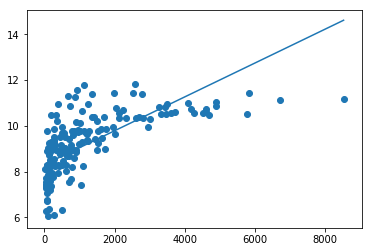

In [28]:
param = metropolis(spending, time)
model_spending = np.linspace(spending.min(), spending.max(), 100)
model_time = model(model_spending, [param[:,0].mean(), param[:,1].mean()])
plt.plot(model_spending, model_time)
plt.scatter(spending, time)

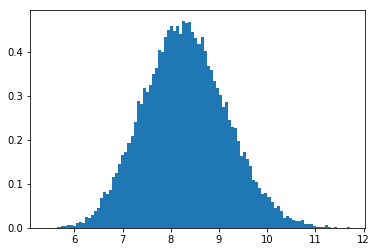

In [29]:
_ =  plt.hist(param[:,1], density=True, bins=100)

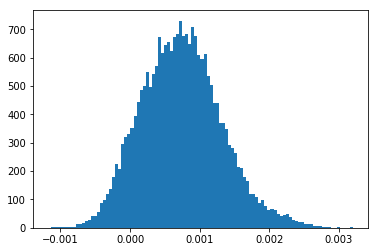

In [30]:
_ =  plt.hist(param[:,0], density=True, bins=100)

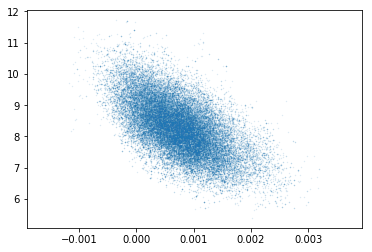

In [32]:
plt.scatter(param[:,0], param[:,1], s=0.1, alpha=0.2)